Connected to Python 3.12.0

2023.1003.2351: Filename ID mismatch
2023.1005.1301: Filename ID mismatch
2023.1007.1254: Filename ID mismatch
2023.1007.1327: Filename ID mismatch
2023.1007.1330: Filename ID mismatch
2023.1009.1502: Filename ID mismatch
2023.1009.1502: Missing or improperly indented hashtags
2023.1015.1626: Filename ID mismatch
2023.1017.1418: Filename ID mismatch
2023.1017.1427: Filename ID mismatch
2023.1017.1427: H1 header YAML ID mismatch
2023.1021.1450: Filename ID mismatch
2023.1027.1229: Filename ID mismatch
2023.1027.1229: H1 header YAML ID mismatch
2023.1102.0911: Filename ID mismatch
2023.1108.1021: Invalid or missing YAML header
2023.1108.1117: Filename ID mismatch
2023.1108.1202: Invalid or missing YAML header
2023.1108.1204: Filename ID mismatch
2023.1108.1204: H1 header YAML ID mismatch
2023.1112.1804: Filename ID mismatch
2023.1112.1804: Missing or improperly indented hashtags
Acad.0.23.0310: H1 header YAML ID mismatch
AI.1.0.23.0504: H1 header YAML ID mismatch
Art.0000.0000: H1 header

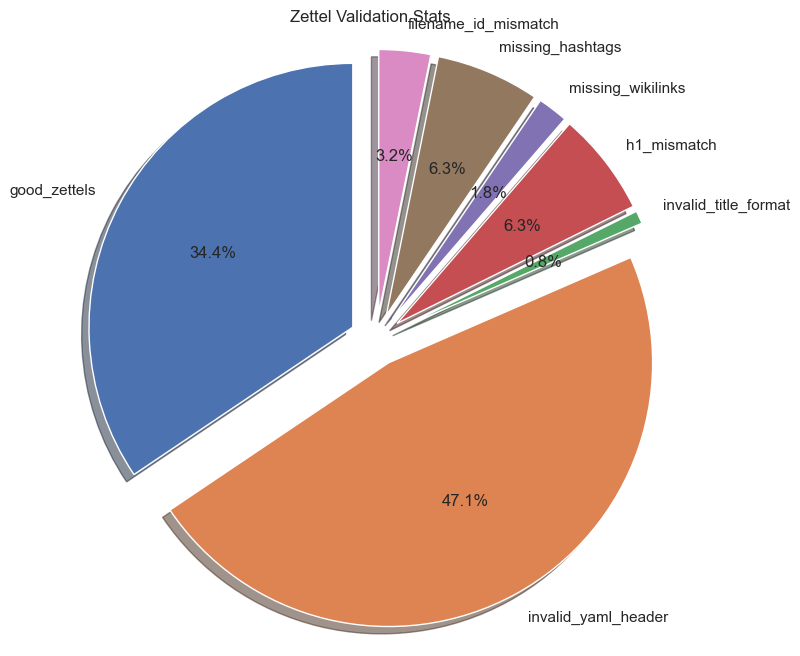

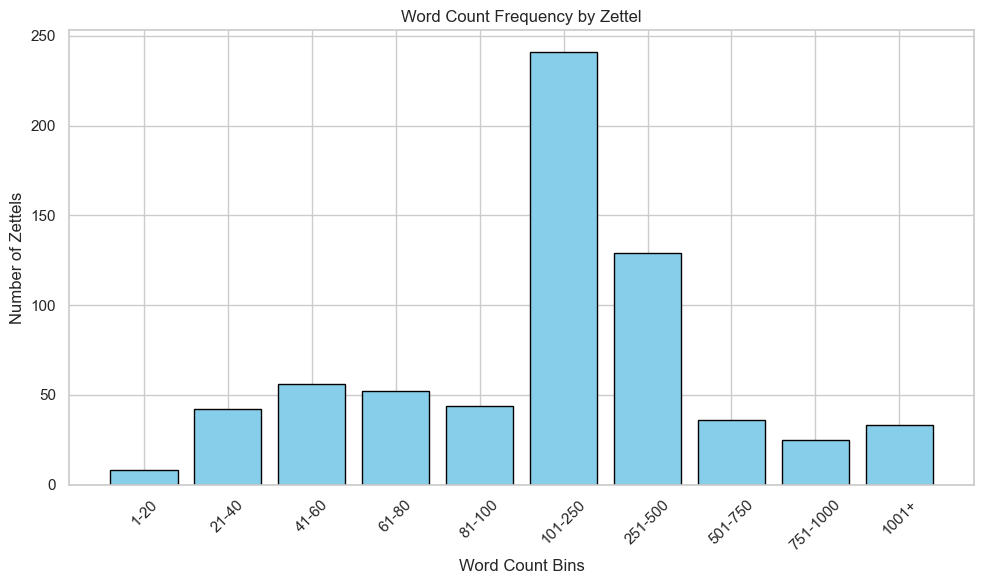

In [3]:
import os
from zettel_validate import zettel_validate, validation_stats
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# Initialize the word frequency bins
word_freq_bins = {
    '1-20': 0,
    '21-40': 0,
    '41-60': 0,
    '61-80': 0,
    '81-100': 0,
    '101-250': 0,
    '251-500': 0,
    '501-750': 0,
    '751-1000': 0,
    '1001+': 0
}

# List to store word counts
word_counts = []

# Directory where the Zettelkasten notes are stored
zettel_directory = 'C:\\Users\\fleng\\OneDrive\\Documents\\Zettelkasten'

# Apply the ggplot style
sns.set(style="whitegrid")

# Use os.listdir to get the list of all files and directories in zettel_directory
for file in os.listdir(zettel_directory):
    # Form the full path to the file
    full_path = os.path.join(zettel_directory, file)
    
    # Check if it's a file and if it has a .md extension
    if os.path.isfile(full_path) and file.endswith('.md'):
        # Open and read the file
        with open(full_path, 'r', encoding='utf-8') as f:
            text = f.read()
            
            # Call zettel_validate function and print the result
            zettel_validate(text, filename_without_extension=os.path.splitext(file)[0])
            
            # Count the number of words in the Zettel
            word_count = len(text.split())
            word_counts.append(word_count)  # Append word count to the list
            
            # Categorize the Zettel based on the number of words into the word frequency bins
            for bin_range, count in word_freq_bins.items():
                if bin_range == '1001+':
                    if word_count > 1000:
                        word_freq_bins[bin_range] += 1
                else:
                    lower, upper = map(int, bin_range.split('-'))
                    if lower <= word_count <= upper:
                        word_freq_bins[bin_range] += 1

# Plot pie chart for validation stats
labels = validation_stats.keys()
sizes = validation_stats.values()
explode = [0.1 if size > 0 else 0 for size in sizes]  # Explode segments with non-zero sizes

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Zettel Validation Stats')
plt.show()

# Plot histogram for word frequencies using the bins defined
bin_edges = [1, 21, 41, 61, 81, 101, 251, 501, 751, 1001]
bin_labels = ['1-20', '21-40', '41-60', '61-80', '81-100', '101-250', '251-500', '501-750', '751-1000', '1001+']
bin_values = [word_freq_bins[bl] for bl in bin_labels]

plt.figure(figsize=(10, 6))
plt.bar(bin_labels, bin_values, color='skyblue', edgecolor='black')
plt.title('Word Count Frequency by Zettel')
plt.xlabel('Word Count Bins')
plt.ylabel('Number of Zettels')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the layout to fit the x labels
plt.show()

No kernel connected